In [1]:
from tkinter import *
from tkinter import filedialog
import tkinter as tk
import os
import cv2
import glob
import random
from PIL import Image, ImageTk
import numpy as np
import matplotlib.pyplot as plt

image in showimage  C:/Users/admin/Projects/Smart-Dustbin/Dataset Images/Biodegradable waste/Fruit and food wastes/2Q__ (3).jpg
1
1
1
1
1
1
1
[[4]
 [6]
 [2]
 [0]]


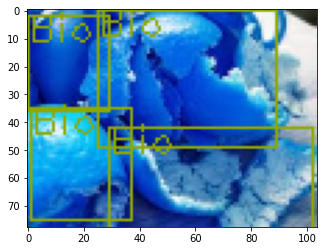

In [2]:
os.chdir(r"path to directory where '.weights' and '.cfg' files are located...")
net = cv2.dnn.readNet("yolov3_training_last.weights", "yolov3_testing.cfg")

# Name custom object
classes = ["NonBio","Bio"]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))


os.chdir(r"path to directory where test images are present...")

def detect(img_path):
    #print('image in detect ',img_path )
    img = cv2.imread(img_path)
    #print("image after cv2 ", img)
    img = cv2.resize(img, None, fx=0.4, fy=0.4)
    height, width, channels = img.shape

    # Detecting objects
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

    net.setInput(blob)
    outs = net.forward(output_layers)

    # Showing informations on the screen
    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.3:
                # Object detected
                print(class_id)
                if(class_id == 0):
                    lbl2['text'] = 'This is non-biodegradable waste'
                    lbl2['bg'] = '#83bad6'
                else:
                    lbl2['text'] = 'This is biodegradable waste'
                    lbl2['bg'] = '#73eb71'
                    
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    print(indexes)
    font = cv2.FONT_HERSHEY_PLAIN
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            color = colors[class_ids[i]]
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 1)
            cv2.putText(img, label, (x, y+10), font, 1, color, 1)


    plt.imshow(img)
    
def showimage():
    fln = filedialog.askopenfilename(initialdir = os.getcwd(), title = "Select Image File", filetypes = (("JPG File","*.jpg"),("PNG file","*.png"),("All Files","*.*")))
    print('image in showimage ',fln)
    
    img = Image.open(fln)
    img.thumbnail((350,300))
    detect(fln)
    img = ImageTk.PhotoImage(img)
    lbl.configure(image = img)
    lbl.image = img
root = Tk()

Height = 300
Width = 350

canvas = tk.Canvas(root, height = Height, width = Width, bg = '#d4f9fa')
canvas.pack()
#frm = Frame(root)
#frm.pack(side = BOTTOM, padx = 15, pady = 15)

frame = tk.Frame(root, bg = '#9dcaf5', bd = 5)
frame.place(relx = 0.5, rely = 0.1, relwidth = 0.85, relheight = 0.6, anchor = 'n')

lbl = Label(frame, bg = '#a1f7c6')
lbl.place(relwidth = 1, relheight = 1)

lower_frame = tk.Frame(root, bg = '#74b4f7', bd = 3)
lower_frame.place(relx = 0.5, rely = 0.725, relwidth = 0.75, relheight=0.1, anchor = 'n')

result = tk.Label(lower_frame, text = "Result", bg = '#ffe07a')
result.place(relwidth = 0.25, relheight = 1)

lbl2 = tk.Label(lower_frame, bg = '#a4e6f5')
lbl2.place(relx = 0.25,relwidth = 0.75, relheight =1)
       
#lbl2 = Label(root)
#lbl2.place(relx = 0.3, rely = 0.6, relwidth = 0.45, relheight = 0.25)
lowest_frame = tk.Frame(root, bg = '#9dcaf5', bd = 3)
lowest_frame.place(relx = 0.5, rely = 0.85, relwidth = 0.5, relheight = 0.1, anchor = 'n')

btn = tk.Button(lowest_frame, text = "Browse Image", command = showimage)
btn.place(relwidth = 0.65, relheight = 1)

btn2 = tk.Button(lowest_frame, text = "Exit", command = lambda: exit())
btn2.place(relx = 0.7, relwidth = 0.3, relheight = 1)

root.title("Waste Segregator")
#root.geometry("300x350")

root.mainloop()